C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Room types and Availability'}, xlabel='longitude', ylabel='latitude'>

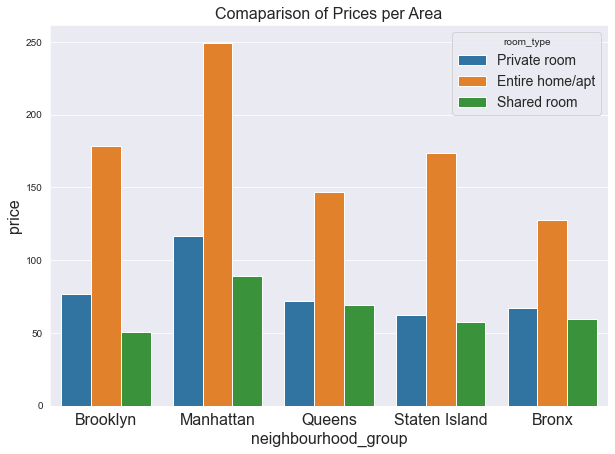

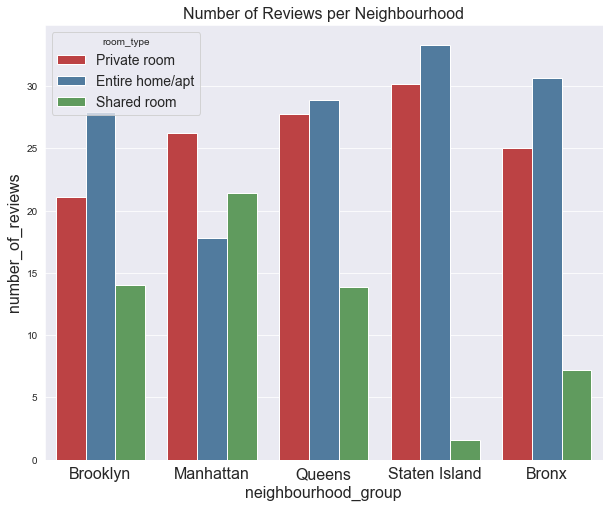

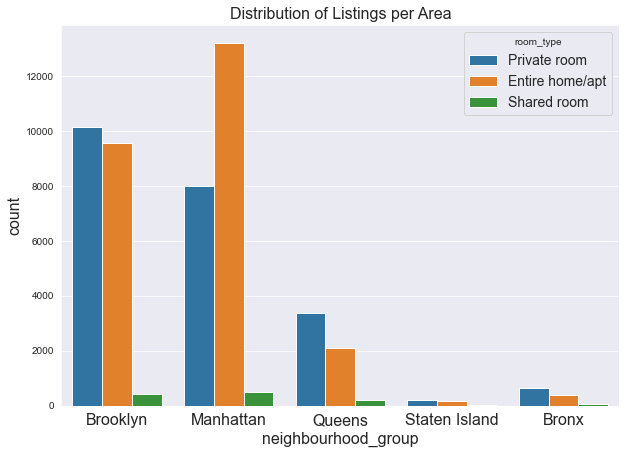

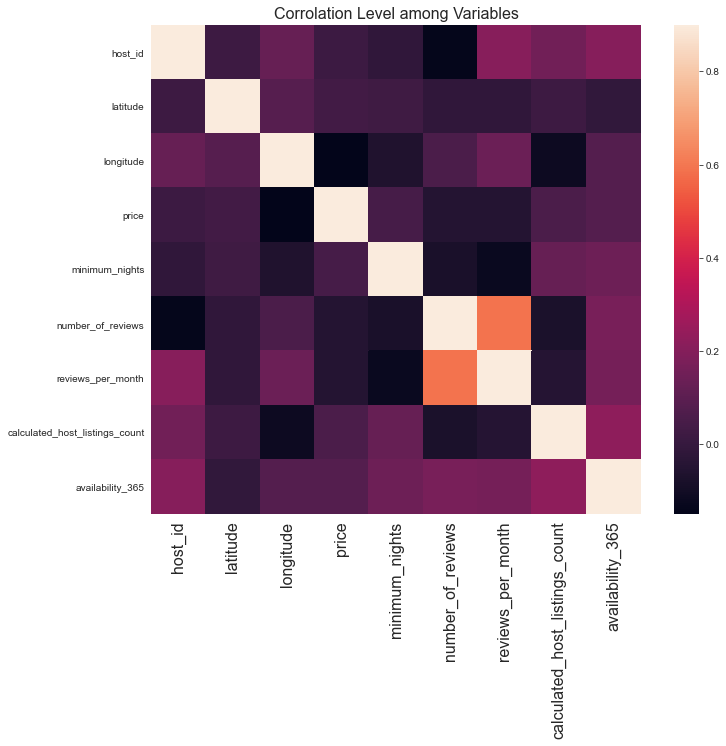

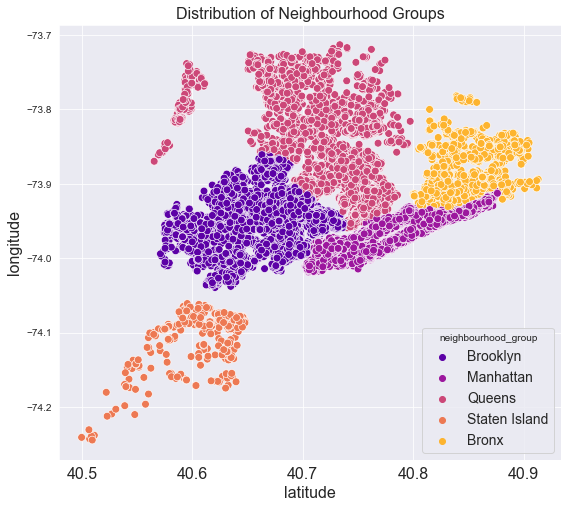

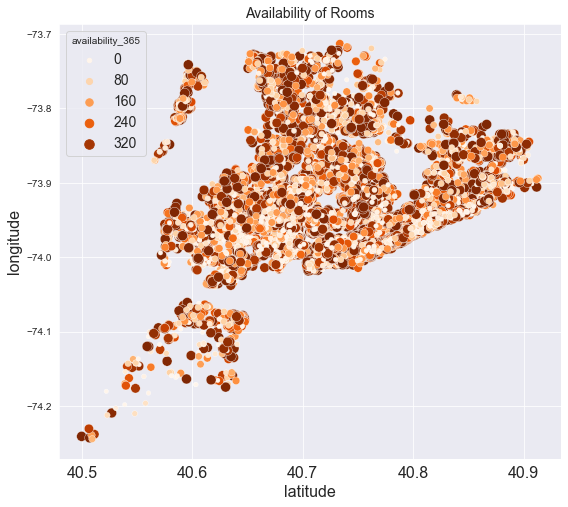

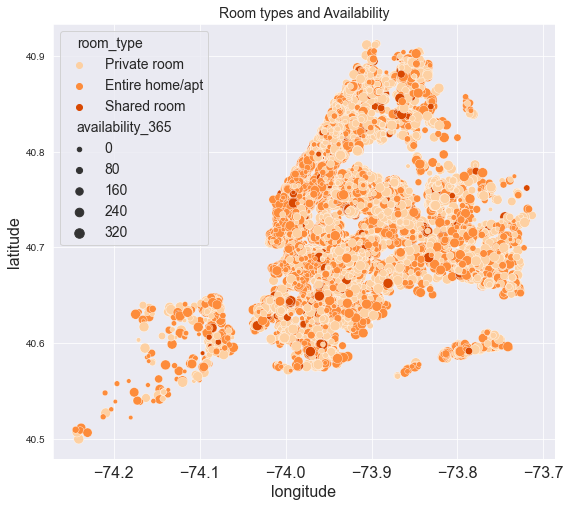

In [3]:
# -*- Data Science Practicals (Analysis of Airbnb Data in NYC 2019) -*- #

###... Import all relevant libraries...###
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

###... Loading the Dataset ...###
# Read the CSV file that contains the dataset using read_csv function
# Display the first 5 records in the pandas dataframe (df)
df = pd.read_csv('Airbnb_NYC_2019.csv', low_memory=False)
df.head()

###...Exploring the Dataset...###
# Checking data types of all columns
df.dtypes
# Checking data shapes
df.shape

# Describing some basic statistics of the data in each column of the data frame
df.describe()

# Checking for null values
df.isnull().sum()

# After careful analysis, we have to drop some less effective columns (attributes)
# last_review,id, host_name
df.drop(['id','host_name','last_review'], axis = 1,inplace=True)
df.shape

# Also, I have filled the NaN values of reviews_per_month with zero and name by NoName
df.reviews_per_month.fillna(value=0,inplace=True)
df.name.fillna("NoName", inplace=True)

# Check to be sure if 'null' values still exist
df.isnull().sum()

# Let's obtain the basic statistics of the price column (attribute)
df["price"].describe()

# Graphical Exploration
#plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.rc('xtick',labelsize=16)
plt.rc('axes',labelsize=16)
plt.rc('axes',titlesize=16)
plt.rc('legend',fontsize=14)
plt.title('Comaparison of Prices per Area')
sns.barplot(df.neighbourhood_group,df.price,hue=df.room_type,ci=None)

# Number of Review per neighbourhood
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.title('Number of Reviews per Neighbourhood')
plt.rc('axes',titlesize=14)
sns.barplot(data=df,x='neighbourhood_group', y='number_of_reviews',hue='room_type',ci=None,palette='Set1', saturation=0.6)

# Determining the distribution of listings across the neighbourhood
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.rc('xtick',labelsize=16)
plt.rc('axes',labelsize=16)
plt.rc('axes',titlesize=16)
plt.rc('legend',fontsize=14)
plt.title('Distribution of Listings per Area')
sns.countplot(df.neighbourhood_group,hue=df.room_type)

# Exploring the correlation level among the data variables.
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.title('Corrolation Level among Variables')

# Exploring the Distribution of neighbourhood by groups
plt.figure(figsize=(9,8))
plt.title('Distribution of Neighbourhood Groups')
plt.rc('axes',titlesize=14)# Here I have compared the prices of all Neighbouhoods with room type segregation
sns.scatterplot(data=df,x='latitude',y='longitude',# sns.set_style('darkgrid')
               hue='neighbourhood_group',# plt.figure(figsize=(10,7))
               palette='plasma',# plt.rc('xtick',labelsize=16)
               s=60)# plt.rc('axes',labelsize=16)


# Analyzing the accomodation availability
plt.figure(figsize=(9,8))
plt.title('Availability of Rooms')
plt.rc('axes',titlesize=14)
sns.scatterplot(data=df,x='latitude',y='longitude',
               size='availability_365',
               hue='availability_365',
               sizes=(20,100),
               palette='Oranges',
               s=70)

# Analysis of the Room type and Availability
plt.figure(figsize=(9,8))
plt.title('Room types and Availability')
plt.rc('axes',titlesize=14)
sns.scatterplot(data=df,x='longitude',y='latitude',
               size='availability_365',
               hue=df.room_type,
               sizes=(20,100),
               palette='Oranges',
               s=70)


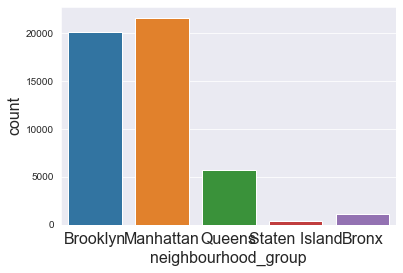

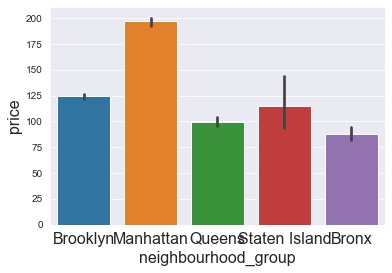

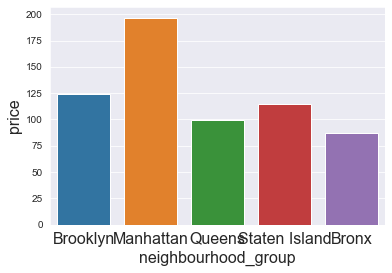

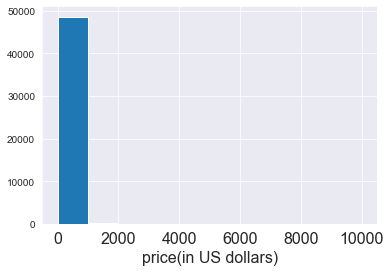

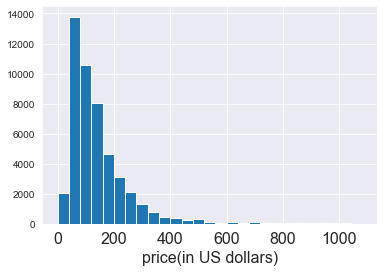

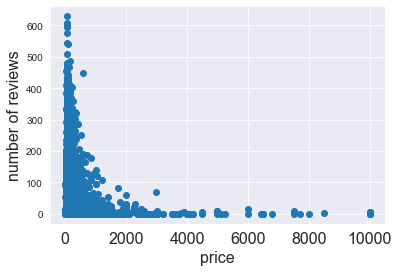

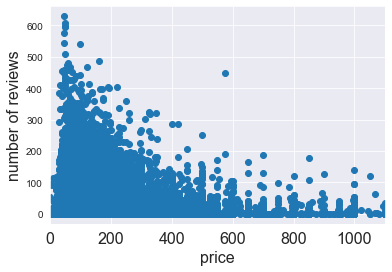

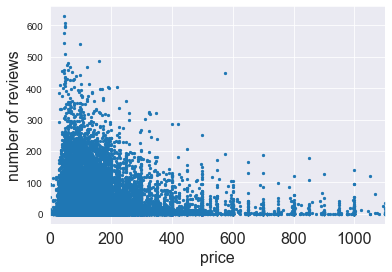

In [4]:
# -*- Data Science Practicals (Analysis of Airbnb Data in NYC 2019) -*- #

# In this section, relevant libraries were imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Read the CSV file that contains the dataset using read_csv function
listings = pd.read_csv('Airbnb_NYC_2019.csv', low_memory=False)

# Display the crime dataset
listings

#Let’s say we want to create a bar chart that displays the count of Airbnb
# listings in each neighborhood group of NY from the listings DataFrame
# To do this, we will use the “countplot” method from the “seaborn” library
# followed by the “show” method from “matplolib.pyplot”
sn.countplot(x= 'neighbourhood_group', data = listings)
plt.show()

#Now, let’s say we want to display the average price Airbnb listings
# in each neighborhood group of NY from the listings DataFrame
# To do this, we will use the “barplot” method from the “seaborn” library
# followed by the “show” method from “matplolib.pyplot”
sn.barplot(x = 'neighbourhood_group', y = 'price', data = listings)
plt.show()

#Now, let’s say we want to display the average price Airbnb listings
# in each neighborhood group of NY from the listings DataFrame
# without the black lines (confidence intervals) at the middle of each bar
# We need to set the parameter "ci" to False as follows:
sn.barplot(x = 'neighbourhood_group', y = 'price', data = listings, ci = False)
plt.show()

# we will use the “plt.hist” method to create a histogram of the quantitative
# data in the price column of the listings dataframe
plt.hist(listings['price'])
plt.xlabel('price(in US dollars)')
plt.show()

# For better visualization of the histogram, I will introduce the 'bins' parameter as follows# #
plt.hist(listings['price'], bins = np.arange(0,1100,40))
plt.xlabel('price(in US dollars)')
plt.show()

# For better visualization of the histogram, I will introduce the 'bins' parameter as follows
plt.scatter(x=listings ['price'], y= listings ['number_of_reviews'])
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.show()

# Let’s say I want to restrict the x-axis, such that the scatter plot only goes up to a price of 1100.
# To do this, we shall recreate the scatter plot as follows
plt.scatter(x=listings ['price'], y= listings ['number_of_reviews'])
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,1100)
plt.show()

# Let’s say I want to decrease the size of points on the scatter plot.
#To do this, we shall recreate the scatter plot using the ‘scatter’ method with the parameter ‘s’ set to 50.
plt.scatter(x=listings ['price'], y= listings ['number_of_reviews'], s = 5)
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,1100)
plt.show()